#AID 565 Computer Vision Assignment 02

Name: **Ronak M Pandya**

Enrollement : **21566013**


Q.1 **Load a pretrained model and print weights of any one layer of the model**

In [4]:
import torch

In [5]:
from torchvision import models

In [6]:
vgg = models.vgg16(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
#printing weight of layer 2
print(vgg.features[2].weight)

Parameter containing:
tensor([[[[-3.0606e-02, -9.8520e-02, -1.3260e-01],
          [ 6.8208e-03, -8.3483e-02, -1.6697e-01],
          [ 3.1015e-02, -6.5803e-02, -1.3171e-01]],

         [[ 4.7407e-02, -2.7588e-02, -5.1127e-02],
          [ 7.0129e-02,  8.2528e-03, -1.8340e-02],
          [ 6.9918e-02,  3.8993e-02,  1.6228e-02]],

         [[ 7.0700e-02,  5.2703e-03, -4.7362e-02],
          [ 8.4006e-02,  4.9190e-02, -1.6474e-03],
          [ 8.5166e-03,  2.2350e-02,  5.9118e-03]],

         ...,

         [[ 2.7666e-02,  2.1778e-02, -9.4606e-03],
          [ 2.5511e-02,  4.1186e-03, -3.4521e-02],
          [ 2.0150e-02,  3.7068e-02, -1.3509e-02]],

         [[ 2.1684e-02,  4.1812e-02,  5.8284e-02],
          [ 2.7431e-02,  3.6847e-02,  3.4335e-02],
          [-9.4839e-03,  1.9745e-02,  5.0264e-02]],

         [[ 2.1769e-02, -2.1388e-02, -9.9363e-02],
          [-5.7156e-02, -7.1328e-02, -7.7600e-02],
          [-3.7508e-02, -2.5453e-02, -4.5096e-03]]],


        [[[-1.3319e-02, -7.7979

Q.2 **Observe the difference between normal and group convolutions. Also try depthwise convolutions, where groups=in_channels**

In [8]:
import torch.nn as nn

In [9]:
#Normal Convolution
conv = nn.Conv2d(
    in_channels=4,
    out_channels = 4,
    kernel_size = 3,
    stride = 1,
    padding= 'same',
    groups = 1
)
print(conv.weight.shape)

torch.Size([4, 4, 3, 3])


In [10]:
#Group convolution with group size = 2
conv_group = nn.Conv2d(
    in_channels=4,
    out_channels = 4,
    kernel_size = 3,
    stride = 1,
    padding= 1 ,
    groups = 2
)
print(conv_group.weight.shape)

torch.Size([4, 2, 3, 3])


In [11]:
conv_group = nn.Conv2d(
    in_channels=4,
    out_channels = 8,
    kernel_size = 3,
    stride = 1,
    padding= 1 ,
    groups = 4
)
print(conv_group.weight.shape)

torch.Size([8, 1, 3, 3])


Q.3 **Load a pretrained model and perform transfer learning on it.**

In [12]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

In [13]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2022-01-26 17:48:04--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 54.230.19.35, 54.230.19.15, 54.230.19.119, ...
Connecting to download.pytorch.org (download.pytorch.org)|54.230.19.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  34.0MB/s    in 1.3s    

2022-01-26 17:48:05 (34.0 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [15]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [16]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


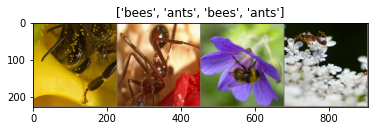

In [17]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [18]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [19]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [20]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [21]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.5630 Acc: 0.7049
val Loss: 0.1958 Acc: 0.9412

Epoch 1/9
----------
train Loss: 0.4152 Acc: 0.7992
val Loss: 0.1740 Acc: 0.9281

Epoch 2/9
----------
train Loss: 0.6294 Acc: 0.7295
val Loss: 0.1613 Acc: 0.9477

Epoch 3/9
----------
train Loss: 0.4804 Acc: 0.7828
val Loss: 0.1533 Acc: 0.9412

Epoch 4/9
----------
train Loss: 0.3802 Acc: 0.8607
val Loss: 0.1521 Acc: 0.9346

Epoch 5/9
----------
train Loss: 0.4237 Acc: 0.8320
val Loss: 0.1804 Acc: 0.9346

Epoch 6/9
----------
train Loss: 0.4140 Acc: 0.8525
val Loss: 0.2789 Acc: 0.9150

Epoch 7/9
----------
train Loss: 0.4332 Acc: 0.7910
val Loss: 0.1918 Acc: 0.9281

Epoch 8/9
----------
train Loss: 0.4052 Acc: 0.8279
val Loss: 0.2165 Acc: 0.9216

Epoch 9/9
----------
train Loss: 0.3131 Acc: 0.8607
val Loss: 0.2348 Acc: 0.9085

Training complete in 0m 44s
Best val Acc: 0.947712


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


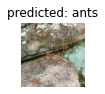

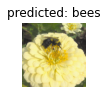

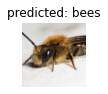

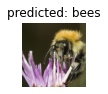

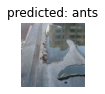

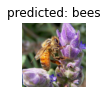

In [22]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Q.4 **Use gradCAM to visualise intermediate activations in a model**

In [1]:
!git clone https://github.com/yaleCat/Grad-CAM-pytorch.git
!mv Grad-CAM-pytorch/assets/ /content/
!mv Grad-CAM-pytorch/grad_cam.py /content/
!rm -rf Grad-CAM-pytorch/
!pip install --upgrade efficientnet-pytorch

Cloning into 'Grad-CAM-pytorch'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 2), reused 23 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=dd42cd0f0f8ff2f2b91ff0c79370619ae7aa1d2dbe83a51f4bcd17df075306ed
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [2]:
import sys
sys.path.append('/')
import cv2
import numpy as np
from torchvision import models
from efficientnet_pytorch import EfficientNet
from grad_cam import GradCam,GuidedBackpropReLUModel,show_cams,show_gbs,preprocess_image
from google.colab.patches import cv2_imshow

In [3]:
model = models.vgg19(pretrained=True)
grad_cam = GradCam(model=model, blob_name = 'features', target_layer_names=['4','20','36'], use_cuda=False)
img = cv2.imread('./assets/dog.jpg', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = preprocess_image(img)
target_index = None
mask_dic = grad_cam(inputs, target_index)
show_cams(img, mask_dic)
gb_model = GuidedBackpropReLUModel(model=model, activation_layer_name = 'ReLU', use_cuda=False)
show_gbs(inputs, gb_model, target_index, mask_dic)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

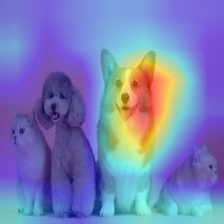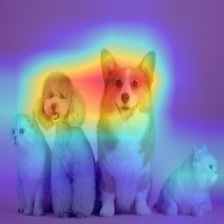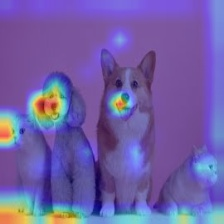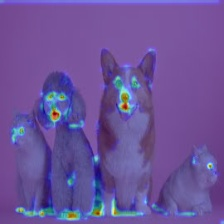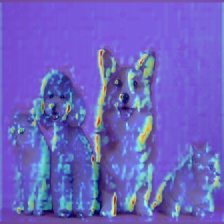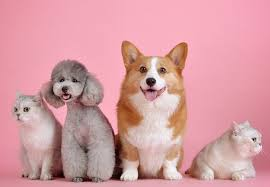

Q.5 **Replace the ReLUs in the code with sigmoid units, and compare the training
and testing accuracies of both the models. Discuss the results**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
test_images.shape
input_shape = (28, 28, 1)
num_classes = 10

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
def Model(activation,epoch):
  if activation == 'relu':
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=activation, input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=activation),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=activation),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=activation),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=activation),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

  elif activation == 'sigmoid':
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=activation , input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=activation),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=activation),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=activation),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=activation),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  history = model.fit(train_images, train_labels, epochs=epoch)

  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f'\nTest accuracy with {activation}:', test_acc)

  pd.DataFrame(history.history).plot(figsize=(10,7))
  plt.grid('True')
  plt.title(f"Accuracy and loss with {activation}")



Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 18s 9ms/step - loss: 0.5197 - accuracy: 0.8137
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3458 - accuracy: 0.8756
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3022 - accuracy: 0.8900
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2816 - accuracy: 0.8974
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2599 - accuracy: 0.9057
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2484 - accuracy: 0.9093
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2381 - accuracy: 0.9132
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2304 - accuracy: 0.9147
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2227 - accuracy: 0.9178
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2140

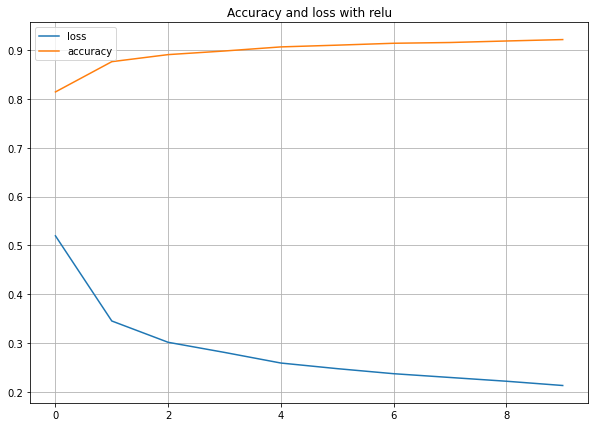

In [ ]:
Model('relu',10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 18s 9ms/step - loss: 2.3083 - accuracy: 0.0992
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.9548 - accuracy: 0.2409
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6497 - accuracy: 0.7594
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4665 - accuracy: 0.8302
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3915 - accuracy: 0.8565
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3557 - accuracy: 0.8696
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3305 - accuracy: 0.8785
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3126 - accuracy: 0.8850
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2954 - accuracy: 0.8917
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2815

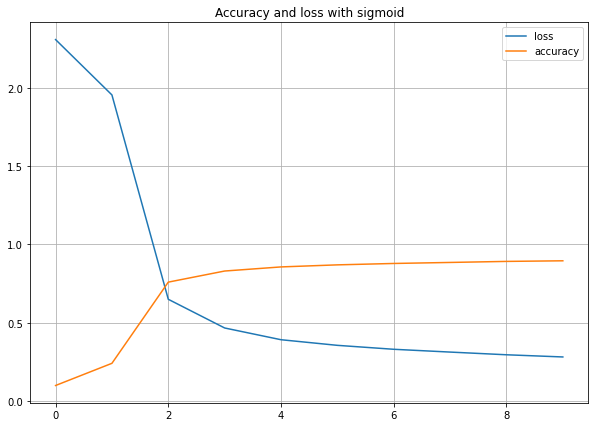

In [ ]:
Model('sigmoid',10)

From the above graphs, we can clearly observed that better accuracy is archived using **Relu** activation function. It is because, when we use Sigmoid activation function, there might be chance of vanishing gradient problem. Moreover Sigmoid activation is computationally expensive as exponential operations are being calcuted at every step.